In [2]:
# 1- Use Python to encrypt this file in AES-CBC mode and decrypt it
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

key = os.urandom(32)
iv = os.urandom(16)

cipher = Cipher(algorithms.AES(key), modes.CBC(iv))
encryptor = cipher.encryptor()

# FILE DATA
f = open("file.txt", "rb")
data = f.read()
print("File size: " + str(len(data))) # 1000 bytes

# ENCRYPT
ct = encryptor.update(data) + encryptor.finalize()
print("Ciphertext: ", ct)

# DECRYPT
decryptor = cipher.decryptor()
pt = decryptor.update(ct) + decryptor.finalize()
print("Plaintext: ", pt)

# **Resposta**: A encriptação vai dar erro porque esta função CBC NÃO fornece padding ao input que adicionamos

File size: 1000


ValueError: The length of the provided data is not a multiple of the block length.

### 2. Repeat this process with OpenSSL
Sendo os valores da chave e do vetor de inicialização gerados aleatóriamente, usamos o seguinte comando para cifrar:
- ```openssl enc -aes-128-cbc -in file.txt -out enc_file -k e3f4045e318f35fc9dcd6f051e3ec78404d571d02c9f31d46eed1ec6854d8674 -iv 6ab080bf5271aa6d1a08284ed06dba03 -nosalt -pbkdf2```
e este para decifrar:
- ```openssl enc -d -aes-128-cbc -in enc_file -out dec_file -k e3f4045e318f35fc9dcd6f051e3ec78404d571d02c9f31d46eed1ec6854d8674 -iv 6ab080bf5271aa6d1a08284ed06dba03 -nosalt -pbkdf2```  

Usamos a cifra por bloco CBC com o standard AES, de tamanho 128 bit (16 bytes).
Ao contrário do exercício anterior, não tivemos erros pois o openssl aplica padding à mesma.
Acrescentamos também que, para este exercício, não utilizamos o salt.

Os resultados destes comandos encontram-se na mesma diretoria com os nomes de 'enc_file', para o ficheiro cifrado, e 'dec_file' com o conteúdo decifrado.


### 3. After encryption, edit the file to change the value of (but not delete!) one byte and decrypt again

#### 3.1.
    Alterei os ultimos bytes da mensagem encriptada, e tudo o que estava antes, continuou perceptivel, no entanto, o bytes seguintes ficaram imperceptiveis. Tal como se pode ver na imagem seguinte.  
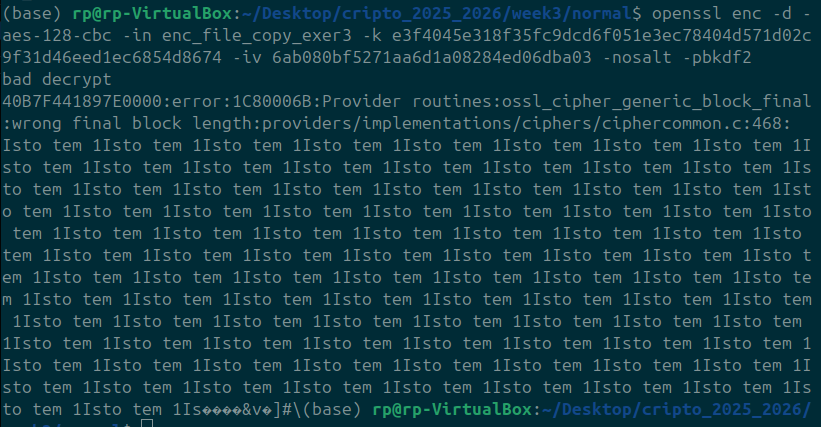

#### 3.2.
    Não é possivel porque, visto que o CBC precisa sempre do bloco anterior para cifrar o bloco seguinte, no caso de termos o primeiro bloco estiver corrompido, automaticamente, todos os blocos seguintes estarão igualmente corrompidos.

#### 3.3.
    No caso de removermos o primeiro byte da mensagem cifrade e tentarmos decifrar, tal como vemos na imagem seguinte, todos o plaintext ficou corrompido. Isto faz com que o alinhamento dos blocos esteja errado.  
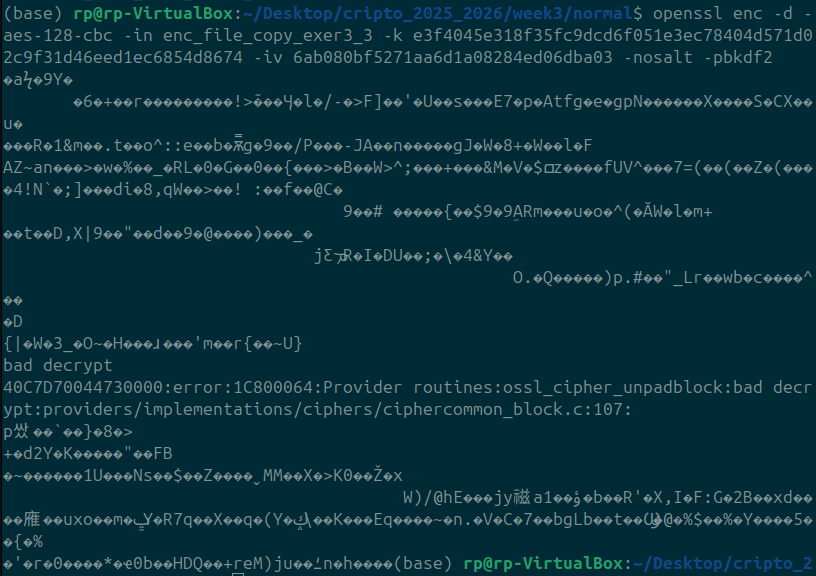

#### 3.4
    Para que se possa alterar a palavra 'hello' para 'Hello' não será necessário re-cifrar o texto todo. Para isso, basta adaptamos o valor do vetor de inicialização IV de modo a que o XOR do primeiro byte seja 'H'.


### 4. Repeat the exercise with CTR mode. What are the differences?

#### 4.1.
    Para este, usei o ficheiro 'file.txt' como plaintext. Este plaintext nada mais é 1000bytes com a mesma mensagem 'Isto tem 1', repetidas várias vezes até que o ficheiro tivesse 100 bytes. 
    Posto isto, cifrei o conteúdo usando o mode CTR (counter) e alteramos 1 byte no meio do ficheiro cifrado e tentamos decrifar o plaintext novamente.
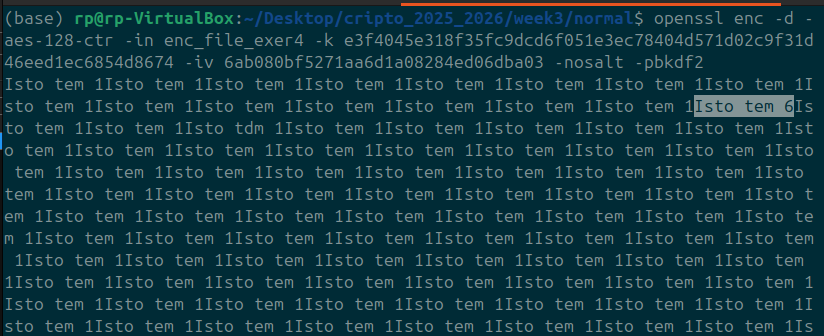  
    Como se pode ver na imagem anterior, no lugar onde o byte foi alterado, a mensagem do plaintext passou de 'Isto tem 1' para 'Isto tem 6'.
    Com isto, o importante será afirmar que independentemente do lugar que se corrompa um byte, o plaintext ficará com o valor original, exceto onde o byte ficou corrompido.

#### 4.2.
    A resposta aplicada a esta pergunta é a mesma da pergunta 4.1.
    Ou seja, como no modo counter não se usa o bloco anterior para se cifrar o bloco seguinte, pode-se dizer que os blocos cifrados são independentes uns dos outros. Isto significa que corrompendo um bloco, não se irá corromper os restantes.

#### 4.3.
    Tal como ocorreu na questão 3.3, aqui também aconteceu o mesmo, isto é, no caso de apagarmos o primeiro byte, toda a mensagem ficou comprometida.
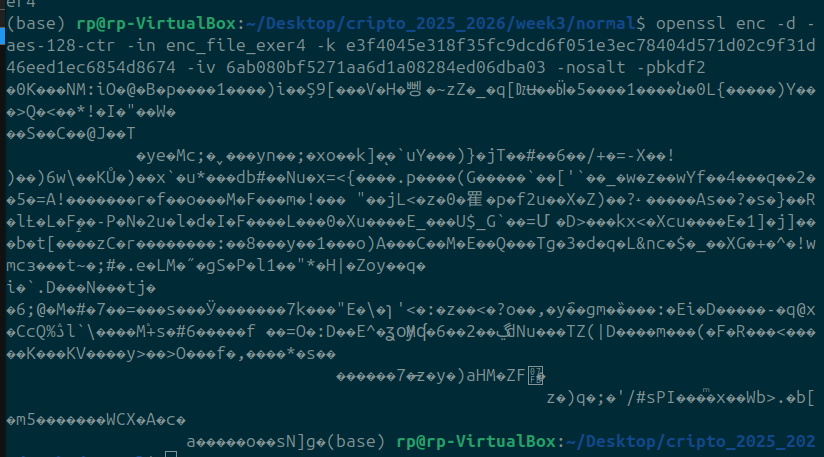

#### 4.4
    Para este caso, também não preciso de decrifar o texto cifrado todo. Como o modo counter não precisa de usar o bloco anterior para cifrar o novo bloco.
    Por isso, para que se altere o valor de 'h' para 'H', pode-se alterar o valor do counter (Ctr), quando se concatena o Nonce com o counter, no primeiro bloco, até que o valor de 'h' passe para 'H'